In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

import sys
sys.path.insert(0, "/Users/lili/dropbox_lili/outliers_package/blackSheep/")
import blacksheep as blsh
sns.set(font = 'arial', style = 'white', color_codes=True, font_scale = 1.3)

# Reading in data

In [2]:
values = pd.read_csv('brca/phospho_common_samples_data.csv', index_col=0)
values.head()

,TCGA-AO-A12D,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AN-A04A,TCGA-BH-A0AV,TCGA-C8-A12T,...,TCGA-BH-A0DD,TCGA-BH-A0E9,TCGA-AR-A0TT,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX
index,,,,,,,,,,,,,,,,,,,,,
NP_001611-S1007s,-0.919089,-0.086607,-2.700983,1.301494,2.952304,-0.663642,-2.718940,-0.194798,-0.262126,-0.457748,...,-0.196892,0.699656,2.543093,0.805357,4.389396,1.338505,3.450978,0.200324,1.728556,1.092898
NP_001611-S1010s,-1.271514,-0.315189,-2.208631,1.820337,3.049420,-0.371558,4.472473,-0.787656,1.760293,2.286200,...,-0.406607,1.131644,-0.097738,-0.124880,0.070029,0.495032,0.776968,1.017243,2.213385,0.444430
NP_001611-S1023s,NaN,NaN,NaN,-0.302638,3.157830,0.528494,2.208079,NaN,NaN,NaN,...,-0.927123,1.701867,1.417613,0.880172,0.812259,0.364182,1.626879,1.985442,-0.342381,1.767384
NP_001611-S1042s,-2.298519,0.819633,-0.419166,1.570435,0.883498,0.043851,0.214017,0.902432,1.842090,0.637370,...,0.699301,2.047456,-0.127163,-0.795385,0.797827,1.628386,1.382329,NaN,NaN,NaN
NP_001611-S1068s,-0.802335,-1.585542,-1.411369,1.394314,2.412517,-0.847546,0.042516,0.189233,0.089599,1.215691,...,-2.398147,0.939409,0.377955,-0.915370,2.065803,3.490470,2.797509,0.485597,2.001793,-0.352144


In [3]:
annotations = pd.read_csv('brca/annotations_common_samples.csv', index_col=0)
annotations.head()

,Sample ID,Biospecimen Barcode Side,UIUD,PAM50,ER Status,PR Status,HER2 Status,QC Status,Proteome Cluster (see Fig. 3b),Phosphoproteome Cluster (see Fig. 3b),...,iTRAQReporterIon,CommonControl,GATA3 Mutation,PIK3CA Mutation,TP53 Mutation,PIK3CA missense mutation in helical domain all tumors,PIK3CA missense mutation in kinase domain all tumors,TP53 Nonsense/Frameshift all tumors,TP53 Missense mutation all tumors,TP53 missense mutations in DNA binding domain all tumors
TCGA-AO-A12D,AO-A12D,TCGA-AO-A12D-01A-41-A21V-30,1DC52613-0C9C-4107-A800-6CF8A5DBC1D7,Her2,Negative,Negative,Positive,pass,1.0,1.0,...,114,YES,NaN,NaN,Frame_Shift_Del|Somatic|p.C242fs,0.0,0.0,1.0,NaN,NaN
TCGA-BH-A18Q,BH-A18Q,TCGA-BH-A18Q-01A-41-A21W-30,5188E257-2542-42DE-AB8F-D1011AA35509,Basal,Negative,Negative,Negative,pass,1.0,3.0,...,115,NO,NaN,NaN,Frame_Shift_Ins|Somatic|p.P76fs,0.0,0.0,1.0,NaN,NaN
TCGA-C8-A130,C8-A130,TCGA-C8-A130-01A-41-A21V-30,28E062F4-E9E6-468B-BF72-BA973B111CCB,Her2,Positive,Positive,Equivocal,pass,2.0,1.0,...,116,YES,NaN,Missense_Mutation|Somatic|p.H1047R,Frame_Shift_Del|Somatic|p.N131fs,NaN,1.0,1.0,NaN,NaN
TCGA-C8-A138,C8-A138,TCGA-C8-A138-01A-14-A21W-30,035ADBBA-464A-4569-9E07-8B6A6BD12407,Her2,Positive,Negative,Positive,pass,2.0,2.0,...,114,YES,NaN,NaN,Frame_Shift_Del|Somatic|p.L308fs,0.0,0.0,1.0,NaN,NaN
TCGA-E2-A154,E2-A154,TCGA-E2-A154-01A-41-A21V-30,7DC5DC2F-EE63-4A02-BF6D-950B8A913082,LumA,Positive,Positive,Negative,pass,3.0,3.0,...,115,NO,NaN,Missense_Mutation|Somatic|p.H1047L,NaN,NaN,1.0,0.0,0.0,0.0


# Isolating which samples annotations for which I want to perform comparisons

In [4]:
for col in ['GATA3 Mutation','PIK3CA Mutation','TP53 Mutation']:
    new_col = '.'.join(col.split()+['Status'])
    annotations[new_col] = annotations[col].isnull()==False

annotations = blsh.binarize_annotations(annotations[[
    'PAM50', 
    'ER Status', 
    'PR Status', 
    'GATA3.Mutation.Status',
    'PIK3CA.Mutation.Status',
    'TP53.Mutation.Status'
]])

# Performing differential outlier analysis for each annotation column

In [5]:
directions = ['up', 'down']

In [7]:
results = {}
for updown in directions:
    results[updown] = blsh.run_outliers(
        values, annotations,
        aggregate=False,
        save_outlier_table=True, 
        save_frac_table=True, 
        save_qvalues=True,
        up_or_down=updown, 
        save_comparison_summaries=True, 
        output_prefix="output/no_agg/brca",
    )

08/13/2019 18:24:28:WARNING:No rows tested for fisherFDR_PAM50_LumA_not-LumA
08/13/2019 18:24:29:WARNING:No rows tested for fisherFDR_PAM50_LumB_not-LumB
08/13/2019 18:24:29:WARNING:No rows tested for fisherFDR_PAM50_LumB_LumB
08/13/2019 18:24:29:WARNING:No rows tested for fisherFDR_PAM50_Basal_not-Basal
08/13/2019 18:24:29:WARNING:No rows tested for fisherFDR_PAM50_Her2_not-Her2
08/13/2019 18:24:29:WARNING:No rows tested for fisherFDR_ER Status_Positive
08/13/2019 18:24:29:WARNING:No rows tested for fisherFDR_PR Status_Positive
08/13/2019 18:24:30:WARNING:No rows tested for fisherFDR_GATA3.Mutation.Status_False
08/13/2019 18:24:30:WARNING:No rows tested for fisherFDR_PIK3CA.Mutation.Status_False
08/13/2019 18:24:30:WARNING:No rows tested for fisherFDR_PIK3CA.Mutation.Status_True
08/13/2019 18:24:30:WARNING:No rows tested for fisherFDR_TP53.Mutation.Status_True
08/13/2019 18:24:30:WARNING:No rows tested for fisherFDR_TP53.Mutation.Status_False
08/13/2019 18:24:52:WARNING:No rows tested

# Making heatmaps

08/13/2019 18:24:59:WARNING:No significant genes at FDR 0.01 in fisherFDR_GATA3.Mutation.Status_True
08/13/2019 18:25:00:WARNING:No significant genes at FDR 0.01 in fisherFDR_PAM50_Her2_Her2
08/13/2019 18:25:00:WARNING:No significant genes at FDR 0.01 in fisherFDR_GATA3.Mutation.Status_True


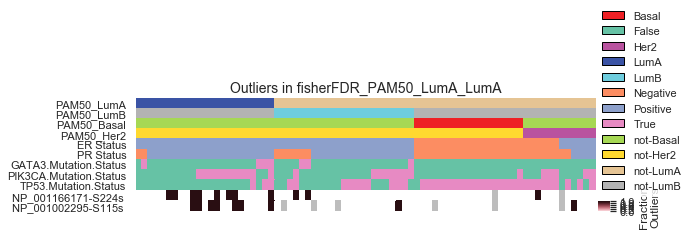

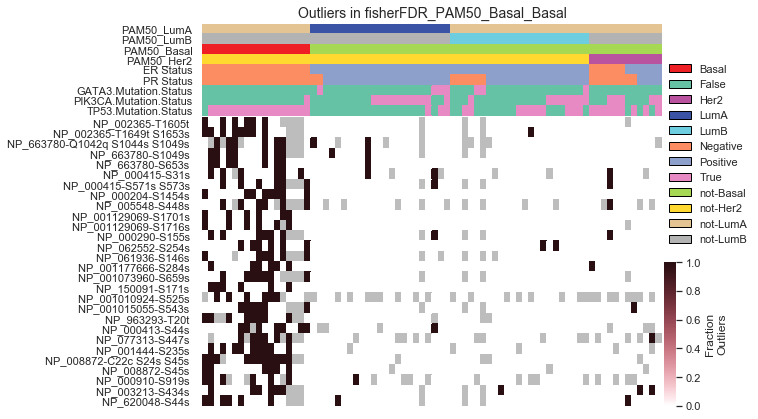

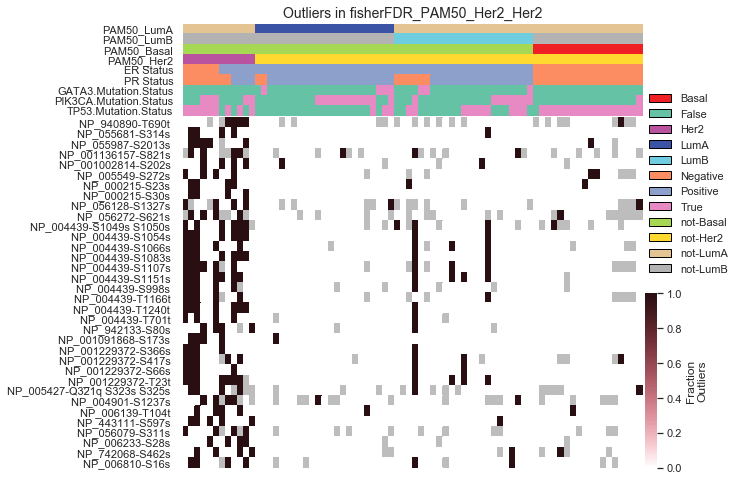

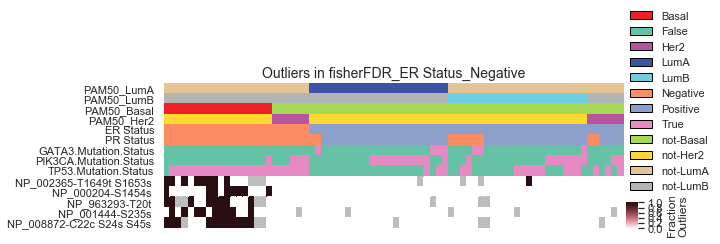

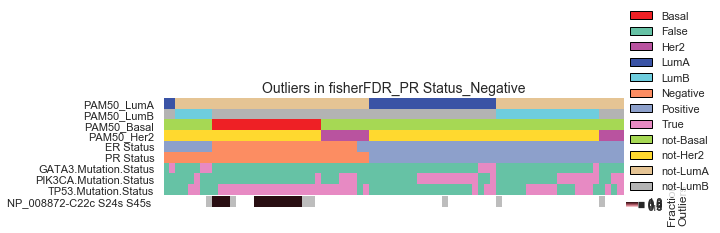

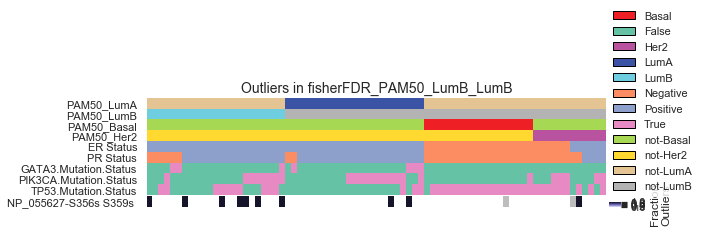

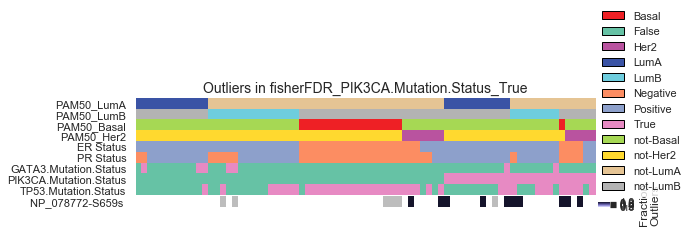

In [8]:
for updown in directions:
    if updown=='up':
        redblue = 'red'
    elif updown == 'down':
        redblue = 'blue'
    
    for col in results[updown][1].df.columns:
        blsh.plot_heatmap(
            annotations, 
            results[updown][1].df, 
            col_of_interest=col, 
            vis_table=results[updown][0].frac_table, 
            fdr=0.01, 
            red_or_blue=redblue, 
            output_prefix="output/no_agg/brca.%s"%updown, 
            savefig=True,
            colors='/Users/lili/dropbox_lili/cptac/brca-prospective/data/annotations_rosters/subtype_NMF_colors.txt'
        )
        

# Performing the same comparisons using rank-sum test on raw values

In [14]:
rank_sums = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = blsh.comparisons.get_sample_lists(annotations, comp)
    
    pvals = values.apply((lambda row: scipy.stats.ranksums(row[group0list], row[group1list])[1]), axis=1)
    qvals = blsh.comparisons._multi_hyp_correct(pvals)
    rank_sums['%s_pval'%(comp)] = pvals
    rank_sums['%s_qval'%(comp)] = qvals
    rank_sums['%s_%s_minus_%s'%(comp, group0, group1)] = values.apply((lambda row: row[group0list].mean() - row[group1list].mean()), axis=1)
    

In [19]:
rank_sums_qs = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = blsh.comparisons.get_sample_lists(annotations, comp)
    rank_sums['%s_logqval'%(comp)] = -np.log10(rank_sums['%s_qval'%(comp)])
    
    rank_sums_qs['%s_%s'%(comp, group0)] = (rank_sums['%s_logqval'%(comp)]*(rank_sums['%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums['%s_%s_minus_%s'%(comp, group0, group1)].abs()))
    

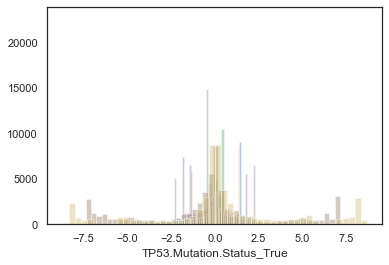

In [20]:
for col in rank_sums_qs.columns:
    sns.distplot(rank_sums_qs[col].dropna(), kde=False)

In [ ]:
rank_sums_qs.to_csv('output/rank_sums.csv')

In [9]:
rank_sums_qs = pd.read_csv('output/rank_sums.csv', index_col=0)

# Reformatting outliers qvalues to match rank sums

In [10]:
signed_qvalues = {}

for updown in directions:
    df = pd.DataFrame()
    for comp in annotations.columns:
        group0, group0list, group1, group1list = blsh.comparisons.get_sample_lists(annotations, comp)
        
        signed_qs = (-np.log10(results[updown][1].df.reindex(['fisherFDR_%s_%s'%(comp, group0)], axis=1)['fisherFDR_%s_%s'%(comp, group0)]).subtract(np.log10(results[updown][1].df.reindex(['fisherFDR_%s_%s'%(comp, group1)], axis=1)['fisherFDR_%s_%s'%(comp, group1)]), fill_value=0))
        signed_qs = pd.DataFrame(signed_qs)
        signed_qs.columns = ['%s_%s'%(comp, group0)]
        df = pd.concat([df, signed_qs], join='outer', axis=1)
    signed_qvalues[updown] = df
    

In [11]:
rank_sums_qs.head()

,PAM50_LumA_not-LumA,PAM50_LumB_not-LumB,PAM50_Basal_not-Basal,PAM50_Her2_not-Her2,ER Status_Positive,PR Status_Positive,GATA3.Mutation.Status_False,PIK3CA.Mutation.Status_False,TP53.Mutation.Status_True
index,,,,,,,,,
NP_001611-S1007s,-0.694653,-0.050609,0.448839,0.060047,0.578863,0.267046,-0.008284,-0.503906,-0.174540
NP_001611-S1010s,-1.132310,0.097698,0.455664,-0.101711,1.429467,0.618928,-0.008284,-0.450986,-0.491866
NP_001611-S1023s,-0.888556,1.398478,0.349438,-0.137684,-1.097395,1.794206,0.008284,-2.033868,-0.109451
NP_001611-S1042s,-1.150488,0.069874,0.344443,0.213141,0.681866,0.348182,-0.008284,0.596453,-0.831576
NP_001611-S1068s,-0.864741,0.063210,0.448839,-0.141827,1.348352,0.483296,-0.008284,-0.419201,-0.840016


In [12]:
signed_qvalues['up'].head()

,PAM50_LumA_not-LumA,PAM50_LumB_not-LumB,PAM50_Basal_not-Basal,PAM50_Her2_not-Her2,ER Status_Positive,PR Status_Positive,GATA3.Mutation.Status_False,PIK3CA.Mutation.Status_False,TP53.Mutation.Status_True
NP_005900-S1965s,NaN,NaN,NaN,-1.066939,NaN,NaN,NaN,NaN,NaN
NP_940890-T690t,NaN,NaN,NaN,-2.268874,NaN,NaN,NaN,NaN,NaN
NP_055681-S314s,NaN,NaN,NaN,-2.365906,NaN,NaN,NaN,NaN,NaN
NP_002365-T1605t,NaN,NaN,-3.977488,NaN,NaN,NaN,NaN,NaN,NaN
NP_002365-T1649t S1653s,NaN,NaN,-4.589121,NaN,-3.801781,NaN,NaN,NaN,NaN


In [13]:
for updown in directions:
    signed_qvalues[updown] = signed_qvalues[updown].reindex(rank_sums_qs.index)

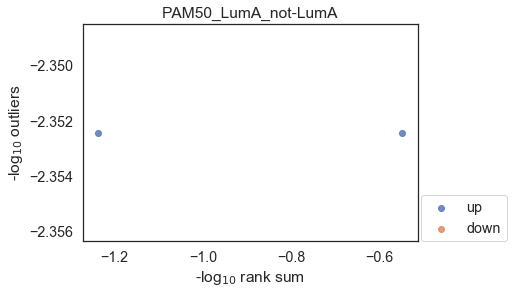

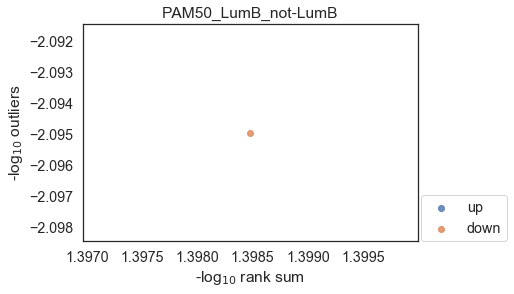

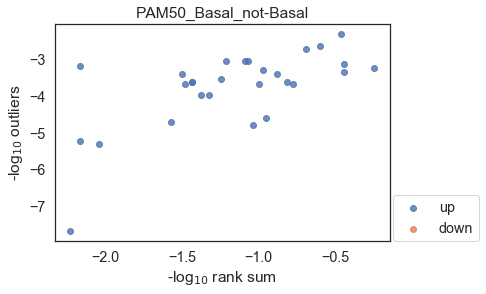

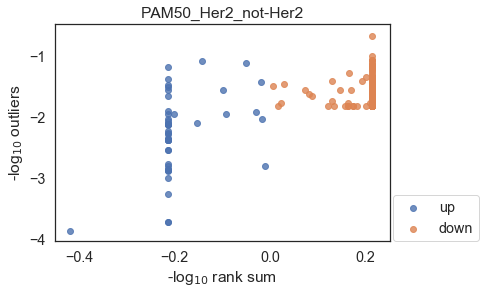

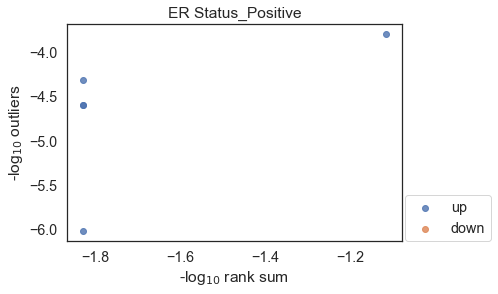

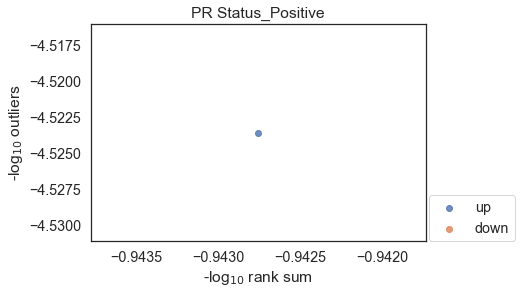

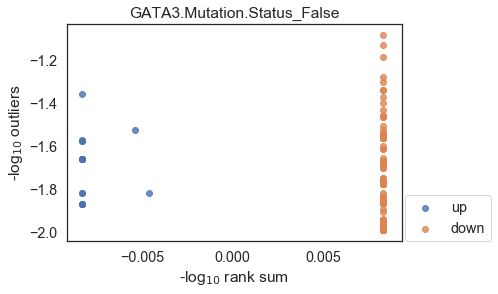

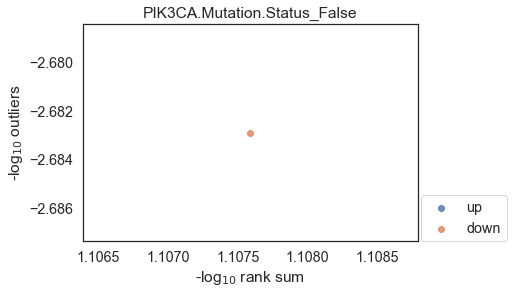

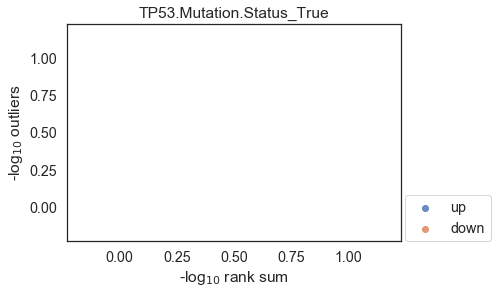

In [16]:
for col in rank_sums_qs.columns:
    for updown in directions:
        sns.regplot(x=rank_sums_qs[col], y=signed_qvalues[updown][col], fit_reg=False, label=updown)
    plt.xlabel('-log$_{10}$ rank sum')
    plt.ylabel('-log$_{10}$ outliers')
    plt.title(col)
    plt.legend(loc=(1.01,0))
    plt.savefig('output/scatter_logqs_%s.pdf'%(col), bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
for col in rank_sums_qs.columns:
    for updown in directions:
        sns.regplot(x=rank_sums_qs[col], y=signed_qvalues[updown][col], fit_reg=False, label=updown)

# Agged

In [17]:
results = {}
for updown in directions:
    _, _ = blsh.run_outliers(
        values, annotations,
        aggregate=True,
        save_outlier_table=True, 
        save_frac_table=True, 
        save_qvalues=True,
        up_or_down=updown, 
        save_comparison_summaries=True, 
        output_prefix="output/agg/brca",
    )